In [30]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import datetime as dt


ModuleNotFoundError: No module named 'dt'

In [7]:
# Reading Data set
baseLSTM_file = pd.read_csv('../Bejing Data/LSTM-Multivariate_pollution.csv')

In [8]:
baseLSTM_file.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [53]:
# baseLSTM_file[0:, 0,1]
first_column = baseLSTM_file.iloc[:, 0]

In [54]:
first_column

date
2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
                       ...  
2014-12-31 19:00:00      8.0
2014-12-31 20:00:00     10.0
2014-12-31 21:00:00     10.0
2014-12-31 22:00:00      8.0
2014-12-31 23:00:00     12.0
Name: pollution, Length: 43800, dtype: float64

In [50]:
baseLSTM_file.date

AttributeError: 'DataFrame' object has no attribute 'date'

In [49]:
january=baseLSTM_file.loc[baseLSTM_file.date.month=="01"]

AttributeError: 'DataFrame' object has no attribute 'date'

In [9]:
# Let's observer the data types
baseLSTM_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [10]:
baseLSTM_file.isna().sum()

date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

### From this we can see there are no null values in this date set so it seems like a plug and chuck data makes sense and its seem like model otimization is the key for this data set

In [11]:
# creating train data set
sixtypercentrow = baseLSTM_file.loc[[26279]]

In [12]:
sixtypercentrow

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
26279,2012-12-31 23:00:00,39.0,-10,-6.0,1018.0,NW,1.79,0,0


In [13]:
# Train test for modedling
train_test=baseLSTM_file[:35039]

In [14]:
train_test

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
35034,2013-12-31 18:00:00,15.0,-19,8.0,1013.0,NW,109.95,0,0
35035,2013-12-31 19:00:00,22.0,-19,7.0,1013.0,NW,114.87,0,0
35036,2013-12-31 20:00:00,18.0,-21,7.0,1014.0,NW,119.79,0,0
35037,2013-12-31 21:00:00,23.0,-21,7.0,1014.0,NW,125.60,0,0


In [15]:
twentypercenttest = baseLSTM_file.loc[[35039]]

In [16]:
twentypercenttest

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
35039,2013-12-31 23:00:00,23.0,-20,7.0,1014.0,NW,137.67,0,0


In [17]:
Last_twenty= baseLSTM_file[35040:]

In [18]:
Last_twenty

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
35040,2014-01-01 00:00:00,24.0,-20,7.0,1014.0,NW,143.48,0,0
35041,2014-01-01 01:00:00,53.0,-20,7.0,1013.0,NW,147.50,0,0
35042,2014-01-01 02:00:00,65.0,-20,6.0,1013.0,NW,151.52,0,0
35043,2014-01-01 03:00:00,70.0,-20,6.0,1013.0,NW,153.31,0,0
35044,2014-01-01 04:00:00,79.0,-18,3.0,1012.0,cv,0.89,0,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [19]:
basePollution_file = pd.read_csv('../Bejing Data/pollution_test_data1_test data.csv')

### **Going to combine 20% of this data to the given test data because it seems a bit to small.**

In [20]:
basePollution_file

,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution
0,-16,4,1027,SE,3.58,0,0,128
1,-17,5,1027,SE,7.60,0,0,77
2,-16,4,1027,SE,9.39,0,0,65
3,-16,1,1028,cv,0.89,0,0,79
4,-14,0,1028,NE,1.79,0,0,93
...,...,...,...,...,...,...,...,...
341,-23,-2,1034,NW,231.97,0,0,8
342,-22,-3,1034,NW,237.78,0,0,10
343,-22,-3,1034,NW,242.70,0,0,10
344,-22,-4,1034,NW,246.72,0,0,8


**Let's See what year the data ends**

In [21]:
testdf=basePollution_file.append(Last_twenty)

In [22]:
testdf.reset_index()

,index,dew,temp,press,wnd_dir,wnd_spd,snow,rain,pollution,date
0,0,-16,4.0,1027.0,SE,3.58,0,0,128.0,NaN
1,1,-17,5.0,1027.0,SE,7.60,0,0,77.0,NaN
2,2,-16,4.0,1027.0,SE,9.39,0,0,65.0,NaN
3,3,-16,1.0,1028.0,cv,0.89,0,0,79.0,NaN
4,4,-14,0.0,1028.0,NE,1.79,0,0,93.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9101,43795,-23,-2.0,1034.0,NW,231.97,0,0,8.0,2014-12-31 19:00:00
9102,43796,-22,-3.0,1034.0,NW,237.78,0,0,10.0,2014-12-31 20:00:00
9103,43797,-22,-3.0,1034.0,NW,242.70,0,0,10.0,2014-12-31 21:00:00
9104,43798,-22,-4.0,1034.0,NW,246.72,0,0,8.0,2014-12-31 22:00:00


In [23]:
baseLSTM_file["date"] = pd.to_datetime(baseLSTM_file["date"], format = '%Y-%m')

In [24]:
baseLSTM_file

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [25]:
baseLSTM_file.index = baseLSTM_file.date

In [26]:
del baseLSTM_file["date"]

In [27]:
baseLSTM_file

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [40]:
baseLSTM_file["dates"]=baseLSTM_file.index



In [41]:
list_of_dates=list(baseLSTM_file.dates)

In [46]:
first_list_date_value=str(list_of_dates[0])

In [47]:
first split=first_list_date_value.split()

['2010-01-02', '00:00:00']

In [ ]:
dt.datetime()

C:\Users\Ice\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


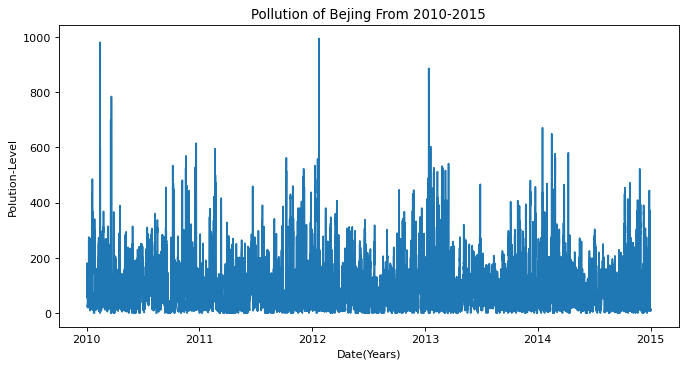

In [24]:
figure(figsize=(10, 5),dpi=80)
sns.lineplot(baseLSTM_file.index,baseLSTM_file.pollution)
plt.title ("Pollution of Bejing From 2010-2015")
plt.ylabel("Polution-Level")
plt.xlabel("Date(Years)");

In [29]:
rolling_mean = baseLSTM_file.pollution.rolling(24).mean()
rolling_std =  baseLSTM_file.pollution.rolling(12).std()

In [30]:
rolling_std

date
2010-01-02 00:00:00         NaN
2010-01-02 01:00:00         NaN
2010-01-02 02:00:00         NaN
2010-01-02 03:00:00         NaN
2010-01-02 04:00:00         NaN
                         ...   
2014-12-31 19:00:00    2.724746
2014-12-31 20:00:00    2.662876
2014-12-31 21:00:00    2.587850
2014-12-31 22:00:00    2.490893
2014-12-31 23:00:00    2.490893
Name: pollution, Length: 43800, dtype: float64

In [31]:
rolling_mean.isna().sum()

23

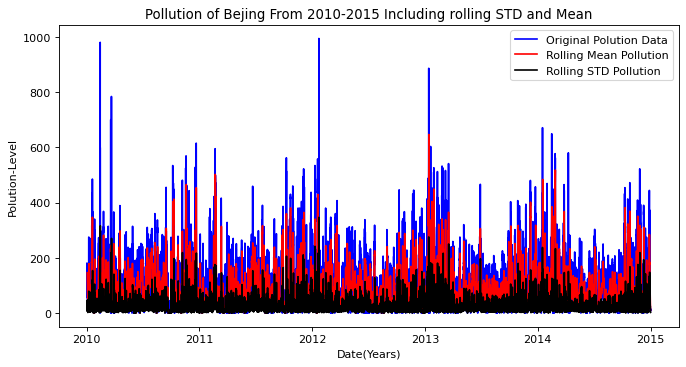

In [33]:
figure(figsize=(10, 5),dpi=80)
plt.plot(baseLSTM_file.pollution,color ="blue", label = "Original Polution Data")
plt.ylabel("Polution-Level")
plt.xlabel("Date(Years)")
plt.plot(rolling_mean,color = "red", label ="Rolling Mean Pollution")
plt.plot(rolling_std,color ="black",label ="Rolling STD Pollution")
plt.title ("Pollution of Bejing From 2010-2015 Including rolling STD and Mean")
plt.legend(loc= "best");

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
adft = adfuller(baseLSTM_file.pollution,autolag="AIC")

In [41]:
output_df= pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0    -21.004109              Test Statistics
1      0.000000                      p-value
2     55.000000             No. of lags used
3  43744.000000  Number of observations used
4     -3.430499          critical value (1%)
5     -2.861606          critical value (5%)
6     -2.566805         critical value (10%)


In [42]:
bdft = adfuller(baseLSTM_file.pollution,autolag="AIC")
output_df= pd.DataFrame({"Values":[bdft[0],bdft[1],bdft[2],bdft[3], bdft[4]['1%'], bdft[4]['5%'], bdft[4]['10%']], "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0    -21.004109              Test Statistics
1      0.000000                      p-value
2     55.000000             No. of lags used
3  43744.000000  Number of observations used
4     -3.430499          critical value (1%)
5     -2.861606          critical value (5%)
6     -2.566805         critical value (10%)


In [43]:
autocorrelation_lag1= baseLSTM_file.pollution.autocorr(lag =1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.95534952633875


In [44]:
autocorrelation_lag3= baseLSTM_file.pollution.autocorr(lag =3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6= baseLSTM_file.pollution.autocorr(lag =6)
print("Seix Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9= baseLSTM_file.pollution.autocorr(lag =9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.8662783275414656
Seix Month Lag:  0.7403645418904068
Nine Month Lag:  0.6367038294580923


In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

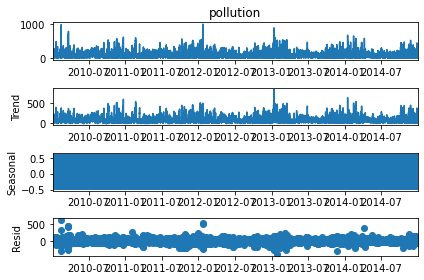

In [46]:
decomepose = seasonal_decompose(baseLSTM_file.pollution,model= "additive",period=7)
decomepose.plot()
plt.show()

In [47]:
new_base=pd.DataFrame(baseLSTM_file["pollution"])

# class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

In [48]:
new_base

,pollution
date,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0
...,...
2014-12-31 19:00:00,8.0
2014-12-31 20:00:00,10.0
2014-12-31 21:00:00,10.0


In [49]:
# train = baseLSTM_file[baseLSTM_file['Date'] < pd.to_datetime("2012-12", format='%Y-%m')]
# train

C:\Users\Ice\AppData\Local\Temp/ipykernel_17764/4222090088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['pollution']
C:\Users\Ice\AppData\Local\Temp/ipykernel_17764/4222090088.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['pollution']


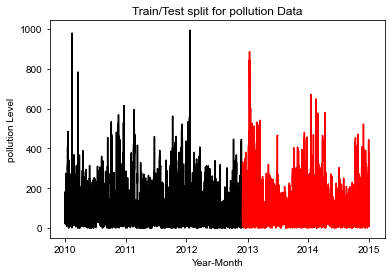

In [50]:
new_base["date"]= new_base.index
train = new_base[new_base['date'] < pd.to_datetime("2012-12", format='%Y-%m')]
train['train'] = train['pollution']
del train['date']
del train['pollution']
test = new_base[new_base['date'] >= pd.to_datetime("2012-12", format='%Y-%m')] ##Need to add "2013-12", to the range gotta figure out way to do this for forcasting
del test['date']
test['test'] = test['pollution']
del test['pollution']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for pollution Data")
plt.ylabel("pollution Level")
plt.xlabel('Year-Month')
sns.set()
plt.show();

In [51]:
# pip install pmdarima

In [52]:
from pmdarima.arima import auto_arima

In [53]:
train

,train
date,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0
...,...
2012-11-30 19:00:00,19.0
2012-11-30 20:00:00,20.0
2012-11-30 21:00:00,25.0


In [54]:
test

,test
date,
2012-12-01 00:00:00,41.0
2012-12-01 01:00:00,46.0
2012-12-01 02:00:00,37.0
2012-12-01 03:00:00,48.0
2012-12-01 04:00:00,43.0
...,...
2014-12-31 19:00:00,8.0
2014-12-31 20:00:00,10.0
2014-12-31 21:00:00,10.0


In [56]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=242162.122, Time=8.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=301933.529, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=242166.724, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=277137.033, Time=4.89 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=320070.136, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=242161.455, Time=1.75 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=263855.354, Time=10.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=242168.618, Time=1.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=242162.124, Time=2.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=256546.582, Time=13.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=242170.270, Time=9.01 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=242163.815, Time=9.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=242492.349, Time=0.68 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 62.350 s

In [59]:
train

,train
date,
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0
...,...
2012-11-30 19:00:00,19.0
2012-11-30 20:00:00,20.0
2012-11-30 21:00:00,25.0


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18264 entries, 2012-12-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    18264 non-null  float64
dtypes: float64(1)
memory usage: 285.4 KB


In [57]:
forecast

,Prediction
date,
2012-12-01 00:00:00,53.319101
2012-12-01 01:00:00,55.252499
2012-12-01 02:00:00,57.016744
2012-12-01 03:00:00,58.691083
2012-12-01 04:00:00,60.280098
...,...
2014-12-31 19:00:00,89.872939
2014-12-31 20:00:00,89.872939
2014-12-31 21:00:00,89.872939


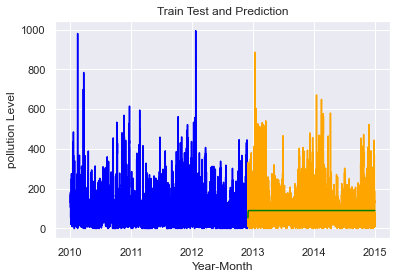

In [73]:
plt.plot(train.train, color = "blue")
plt.plot(test.test, color = "orange")
plt.plot(forecast,color="green")

plt.title("Train Test and Prediction")
plt.ylabel("pollution Level")
plt.xlabel('Year-Month')
# sns.set()
plt.show();

In [70]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  96.33649141034284


In [95]:
# Saving Train test split data
train_test.to_csv(r'../Bejing Data/Train_Test.csv')

In [86]:
#Saving Development data
testdf.to_csv(r'../Bejing Data/Dev_data.csv')